In [12]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [22]:
data = pd.read_csv("card_transdata.csv")
y = data['fraud']
X = data.drop(['fraud'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=False)
data_normalize = pd.read_csv("data_normalize.csv")
y_normalize = data_normalize['fraud']
X_normalize = data_normalize.drop(['fraud'], axis=1)
X_train_normalize, X_test_normalize, y_train_normalize, y_test_normalize = train_test_split(X_normalize, y_normalize, test_size=0.10, random_state=42)
data_winsorize = pd.read_csv("data_winsorize.csv")
y_winsorize = data_winsorize['fraud']
X_winsorize = data_winsorize.drop(['fraud'], axis=1)
X_train_winsorize, X_test_winsorize, y_train_winsorize, y_test_winsorize = train_test_split(X_winsorize, y_winsorize, test_size=0.10, random_state=42)


In [14]:
reg = LogisticRegression(random_state=0).fit(X, y)
reg.score(X_test, y_test)
reg.predict(X_test)
print('data',accuracy_score(y_test, reg.predict(X_test)))
reg_normalize = LogisticRegression(random_state=0).fit(X_normalize, y_normalize)
reg_normalize.score(X_test_normalize, y_test_normalize)
reg_normalize.predict(X_test_normalize)
print('data normalize',accuracy_score(y_test_normalize, reg_normalize.predict(X_test_normalize)))
reg_winsorize = LogisticRegression(random_state=0).fit(X_winsorize, y_winsorize)
reg_winsorize.score(X_test_winsorize, y_test_winsorize)
reg_winsorize.predict(X_test_winsorize)
print('data winsorize',accuracy_score(y_test_winsorize, reg_winsorize.predict(X_test_winsorize)))




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


data 0.95786
data normalize 0.91297
data winsorize 0.92545


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
data_normalize.head()

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,42.672271,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,3,2.336379,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,4,42.672271,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [15]:
print('data',f1_score(y_test, reg.predict(X_test)))
print('data normalize',f1_score(y_test_normalize, reg_normalize.predict(X_test_normalize)))
print('data winsorize',f1_score(y_test_winsorize, reg_winsorize.predict(X_test_winsorize)))

data 0.7049845981517782
data normalize 0.0
data winsorize 0.47183846971307125


In [16]:
print('data',recall_score(y_test, reg.predict(X_test)))
print('data normalize',recall_score(y_test_normalize, reg_normalize.predict(X_test_normalize)))
print('data winsorize',recall_score(y_test_winsorize, reg_winsorize.predict(X_test_winsorize)))


data 0.585328993257382
data normalize 0.0
data winsorize 0.3826266804550155


In [17]:
print('data',precision_score(y_test, reg.predict(X_test)))
print('data normalize',precision_score(y_test_normalize, reg_normalize.predict(X_test_normalize)))
print('data winsorize',precision_score(y_test_winsorize, reg_winsorize.predict(X_test_winsorize)))

data 0.8861316437873988
data normalize 0.0
data winsorize 0.61529933481153


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print('data',roc_auc_score(y_test, reg.predict(X_test)))
print('data normalize',roc_auc_score(y_test_normalize, reg_normalize.predict(X_test_normalize)))
print('data winsorize',roc_auc_score(y_test_winsorize, reg_winsorize.predict(X_test_winsorize)))

data 0.7891250318701624
data normalize 0.5
data winsorize 0.6799109940386954


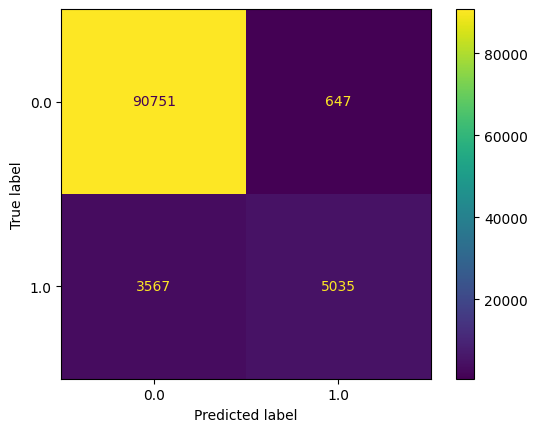

In [19]:

from sklearn.metrics import ConfusionMatrixDisplay


# print('data',confusion_matrix(y_test, reg.predict(X_test)))
# print('data normalize',confusion_matrix(y_test_normalize, reg_normalize.predict(X_test_normalize)))
# print('data winsorize',confusion_matrix(y_test_winsorize, reg_winsorize.predict(X_test_winsorize)))
cm = confusion_matrix(y_test, reg.predict(X_test), labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()

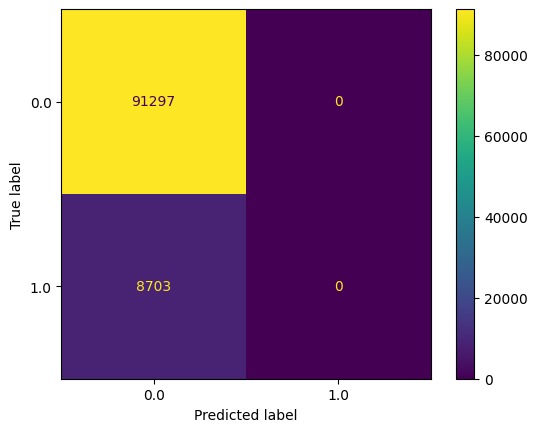

In [20]:
cm = confusion_matrix(y_test_normalize, reg_normalize.predict(X_test_normalize), labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()

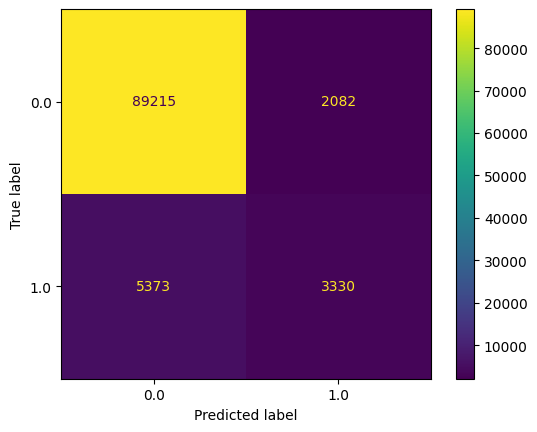

In [21]:
cm = confusion_matrix(y_test_winsorize, reg_winsorize.predict(X_test_winsorize), labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()